## Build a Classification Model to predict marketing Response

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from  sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Morris-mk/IFood_Marketing-data-Analysis-segmentation-and-classification/refs/heads/main/data/Cleaned_dataframe.csv')
df.head()

,ID,Customer_age,Age_group,Income,Income_group,Customer_days,Education,Marital_Status,Kidhome,Teenhome,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,63,Senior,58138.0,middle_income,4721,Graduation,Single,0,0,...,10,4,7,0,0,0,0,0,0,1
1,2174,66,Senior,46344.0,middle_income,4171,Graduation,Single,1,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,55,Pre-Senior,71613.0,middle_income,4370,Graduation,Together,0,0,...,2,10,4,0,0,0,0,0,0,0
3,6182,36,Adult,26646.0,low_income,4197,Graduation,Together,1,0,...,0,4,6,0,0,0,0,0,0,0
4,5324,39,Adult,58293.0,middle_income,4219,PhD,Married,1,0,...,3,6,5,0,0,0,0,0,0,0


## Data Preprocessing

In [16]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True, dtype=int)
print(df.shape)
df.head()

(2229, 32)


,ID,Customer_age,Age_group,Income,Income_group,Customer_days,Education,Kidhome,Teenhome,Recency,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,63,Senior,58138.0,middle_income,4721,Graduation,0,0,58,...,0,0,0,0,0,1,0,1,0,0
1,2174,66,Senior,46344.0,middle_income,4171,Graduation,1,1,38,...,0,0,0,0,0,0,0,1,0,0
2,4141,55,Pre-Senior,71613.0,middle_income,4370,Graduation,0,0,26,...,0,0,0,0,0,0,0,0,1,0
3,6182,36,Adult,26646.0,low_income,4197,Graduation,1,0,26,...,0,0,0,0,0,0,0,0,1,0
4,5324,39,Adult,58293.0,middle_income,4219,PhD,1,0,94,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# split the data into train and test splits
X = df.drop(['ID', 'Response', 'Age_group', 'Income_group' ], axis=1) # include calculated columns
y = df.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train

,Customer_age,Income,Customer_days,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
608,47,18978.0,4623,Basic,1,0,41,2,8,1,...,0,0,0,0,0,0,1,0,0,0
96,60,47916.0,4642,Graduation,0,1,72,505,0,26,...,0,0,0,1,0,0,0,0,0,1
1811,58,62568.0,4141,Graduation,0,1,99,362,17,398,...,1,0,0,0,0,0,0,0,1,0
2009,69,22263.0,4149,Graduation,1,1,31,17,0,2,...,0,0,0,0,0,1,0,0,0,0
692,60,78468.0,4139,Graduation,0,0,29,434,22,388,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,50,93790.0,4195,Graduation,0,0,16,1302,68,731,...,1,0,0,1,1,0,0,1,0,0
1027,47,79593.0,4106,Graduation,0,0,70,350,60,568,...,0,0,0,0,1,0,1,0,0,0
64,72,70666.0,4263,Graduation,0,0,29,398,40,367,...,0,0,0,0,0,0,0,0,1,0
913,65,46015.0,4135,PhD,1,1,25,38,0,2,...,0,1,1,0,0,0,0,0,1,0


In [18]:
# define education order and encode
ed_order = ['PhD', 'Master', 'Graduation', 'Basic', '2n Cycle']
ord_encoder = OrdinalEncoder(categories=[ed_order])

X_train['Education_encoded'] = ord_encoder.fit_transform(X_train[['Education']])
X_test['Education_encoded'] = ord_encoder.transform(X_test[['Education']])

# output
X_test

,Customer_age,Income,Customer_days,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_encoded
2035,49,37150.0,4714,Graduation,1,0,80,167,37,64,...,0,0,0,0,0,1,0,0,0,2.0
469,42,38415.0,4601,Graduation,1,1,91,22,1,13,...,0,0,0,0,0,1,0,0,0,2.0
509,61,89120.0,4162,Master,0,0,78,1168,92,408,...,0,0,0,1,0,0,0,1,0,1.0
1340,44,62061.0,4360,Graduation,0,1,12,641,7,84,...,0,0,1,0,0,0,0,1,0,2.0
2024,45,55914.0,4484,Graduation,0,1,32,384,60,364,...,0,0,0,0,0,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,56,55761.0,4124,Graduation,0,1,97,136,1,12,...,0,0,1,0,0,0,0,1,0,2.0
652,73,73059.0,4360,PhD,0,1,36,410,112,420,...,0,0,0,0,0,0,0,1,0,0.0
606,51,26877.0,4372,Master,0,0,74,101,13,76,...,0,0,0,0,0,0,1,0,0,1.0
339,70,59292.0,4439,PhD,0,1,71,378,14,68,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
# drop original education columns
X_train = X_train.drop('Education', axis=1)
X_test = X_test.drop('Education', axis=1)

X_train.info()

## Model Building

In [52]:
# investigate class imbalance
class_dist = df.Response.value_counts(normalize=True).to_frame()*100
class_dist

,proportion
Response,
0,85.015702
1,14.984298


Text(0.5, 1.0, 'Response Value counts')

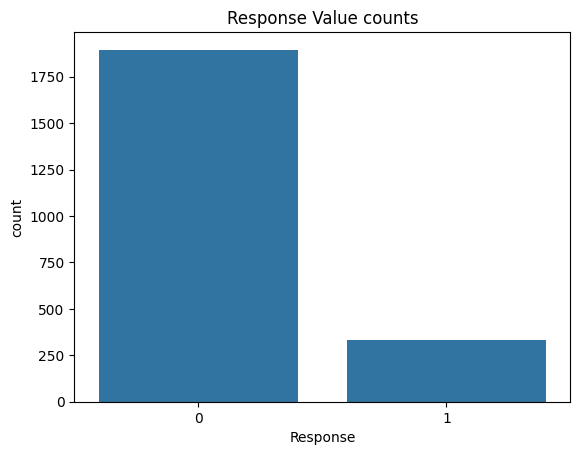

In [41]:
sns.countplot(data=df, x='Response')
plt.title('Response Value counts')

The **target feature** Response is **highly unbalanced**, take that into consideration when building the model
- Response(0) takes about 85% of all the values in the Response column

### A Random Forest Classifier 
- Build a Random forest classifier with default parameters to set the benchmark metric scores for future iterations

In [50]:
# initialize the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# fit the model
model.fit(X_train, y_train)

# produce predsictions the models perfomance
y_preds = model.predict(X_test)

# evaluate the models perfomance
print(classification_report(y_preds, y_test))


              precision    recall  f1-score   support

           0       0.99      0.89      0.94       420
           1       0.31      0.81      0.45        26

    accuracy                           0.89       446
   macro avg       0.65      0.85      0.69       446
weighted avg       0.95      0.89      0.91       446



# Try upsampling or down sampling 
- SMOTE